# Clustering

## Phase I


### Notebook by [Marco Tavora](https://marcotavora.me/)

## Table of contents

1. [Introduction](#Introduction)
2. [Import modules](#Import-modules)
2. [K-Means Clustering](#K-Means-Clustering)

## Introduction
[[go back to the top]](#Table-of-contents)


## Import modules
[[go back to the top]](#Table-of-contents)

In [19]:
%matplotlib inline

%run all_modules_import.ipynb 

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import pandas as pd
from random import randint

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

## Table of contents

1. [Introduction](#Introduction)
2. [Data](#Data)
3. [K-Means Clustering](#K-Means-Clustering)

## Introduction
[[go back to the top]](#Table-of-contents)

## Data
[[go back to the top]](#Table-of-contents)

Exporting the `csv` file containing the dataset. 

Sources:
- [Lojas em Shopping Centers](http://www.faccamp.br/new/arq/pdf/mestrado/Documentos/producao_discente/givaldo_guilherme_dos_santos.pdf)

## Toy database
[[go back to the top]](#Table-of-contents)

In [20]:
raw = pd.read_csv('initial_data.csv')
raw.head()

,loja,total_de_lojas,total_ABL_m2,area_infuencia_km2,quantidade_domicilios_mil,potencial_de_consumo_milhoes,tamanho_da_loja,tamanho_da_frente_m,corredor,fluxo_de_pessoas_corredor_minuto
0,0,350,26250,5,10,1000,40,4.5,2,20
1,1,350,26250,5,10,1000,40,4.5,2,20
2,2,350,26250,5,10,1000,40,4.5,3,20
3,3,350,26250,5,10,1000,40,4.5,0,20
4,4,350,26250,5,10,1000,40,4.5,3,20


## Auxiliar functions
[[go back to the top]](#Table-of-contents)

In [21]:
def data_generator(rows, mu, ratio):
    nums = np.random.normal(mu, 
                            mu*ratio, 
                            rows)
    nums = [int(num) for 
            num in nums]
    return nums

def dummy_generator(rows, num_classes):
    lst = []
    for _ in range(rows):
        lst.append(randint(0, num_classes))
    return lst

def columns_generator(data, ratio):
    for col in data.columns.tolist()[1:]:
        data[col] = data_generator(rows, 
                                   data[col].mean(), 
                                   ratio)
    return data

In [22]:
rows = raw.shape[0]
df = columns_generator(raw, 0.25)
df['corredor'] = dummy_generator(rows, 4)
df.head()

,loja,total_de_lojas,total_ABL_m2,area_infuencia_km2,quantidade_domicilios_mil,potencial_de_consumo_milhoes,tamanho_da_loja,tamanho_da_frente_m,corredor,fluxo_de_pessoas_corredor_minuto
0,0,324,20090,5,13,1061,35,4,0,29
1,1,351,20143,5,6,1201,32,4,1,25
2,2,239,25913,7,6,984,18,4,4,14
3,3,474,22717,2,11,698,46,5,0,10
4,4,321,30175,3,10,1164,44,4,3,9


![title](shopping_info.png)

## K-Means Clustering
[[go back to the top]](#Table-of-contents)

###  Examine pairs of features 

- Plot them to see if there are obvious patters
- Initialize the instance `KMeans` 
- Try to fit our sub-dataframe using the `fit` method

In [23]:
cols_to_keep = df.columns.tolist()

n=2

def pairs_comb(cols, n):
    return [list(cols) for cols in 
         itertools.combinations(df[cols], n)]

print('Examples of pairs:', pairs_comb(cols_to_keep, 2)[0:5])

Examples of pairs: [['loja', 'total_de_lojas'], ['loja', 'total_ABL_m2'], ['loja', 'area_infuencia_km2'], ['loja', 'quantidade_domicilios_mil'], ['loja', 'potencial_de_consumo_milhoes']]


In [24]:
pairs = pairs_comb(cols_to_keep, 2)
len(pairs)

45

In [25]:
cols_to_keep = df.columns.tolist()
N = df.shape[0]
s = (15*np.random.rand(N))**2
c = np.random.rand(N)
pairs = pairs_comb(cols_to_keep, 2)
l = len(pairs)

In [8]:
l

45

### Sample of scatter plots

In [ ]:
df = df[cols_to_keep]
fig = plt.figure(figsize=(40, 60));
fig.subplots_adjust(hspace=0.4, wspace=0.4);
for i in range(1, l+1):
    ax = fig.add_subplot(15, 3, i);
    x, y = pairs[i-1][0], pairs[i-1][1];
    ax.scatter(df[x], df[y], s=s, c=c, alpha=0.5);
    plt.ylabel(y)
    plt.xlabel(x)
fig.savefig('clusters-retail-11.png')

![title](clusters-retail-11.png)

### Run K-Means

In [39]:
features = df.columns.tolist()[1:3]
df[features].head()

,total_de_lojas,total_ABL_m2
0,324,20090
1,351,20143
2,239,25913
3,474,22717
4,321,30175


In [55]:
k = 5
model = KMeans(n_clusters=k, 
               max_iter=1)
model.fit(df[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Assign clusters back to our dataframe

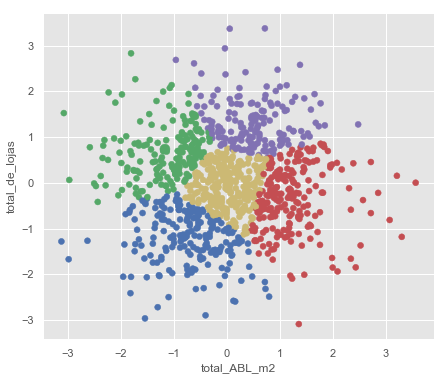

In [58]:
df['cluster'] = model.labels_
centroids  =  model.cluster_centers_

base_colors  =  ['r', 'g', 'b', 'y', 'm']
colors       =  [base_colors[centroid] for centroid in model.labels_]

fig, ax      =  plt.subplots(figsize=(7,6))
ax.scatter(df[features[0]], df[features[1]], c=colors);
ax.scatter(centroids[:,0], centroids[:,1], c=base_colors, s=100);
plt.ylabel(features[0]);
plt.xlabel(features[1]);

### Score

In [42]:
silhouette = silhouette_score(df[features], df['cluster'], metric='euclidean')
inertia = model.inertia_
print("Silhouette Score: ", silhouette)
print("Inertia Score: ", inertia)

Silhouette Score:  0.5171968429697388
Inertia Score:  8715976441.7152


### What's predicted 

In [59]:
print(list(model.labels_))

[2, 3, 1, 0, 3, 3, 4, 3, 2, 1, 3, 3, 4, 3, 3, 2, 3, 1, 2, 4, 0, 1, 3, 3, 0, 3, 0, 1, 4, 4, 4, 0, 4, 3, 0, 4, 1, 4, 0, 4, 0, 1, 3, 0, 1, 2, 2, 0, 3, 0, 3, 3, 2, 3, 0, 3, 3, 1, 1, 3, 2, 2, 2, 4, 0, 0, 3, 3, 4, 2, 2, 0, 2, 3, 0, 0, 2, 0, 1, 1, 1, 4, 3, 4, 3, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 0, 3, 2, 2, 4, 3, 3, 2, 3, 2, 2, 4, 4, 4, 2, 0, 1, 0, 0, 3, 4, 4, 2, 1, 0, 1, 3, 3, 2, 1, 4, 1, 2, 2, 3, 3, 1, 3, 2, 3, 3, 0, 3, 3, 1, 4, 2, 3, 1, 1, 4, 0, 1, 4, 3, 0, 0, 1, 0, 4, 3, 1, 0, 3, 3, 4, 3, 1, 2, 4, 1, 0, 4, 1, 1, 3, 4, 4, 0, 4, 0, 3, 0, 2, 2, 3, 2, 0, 4, 2, 3, 0, 2, 0, 3, 2, 1, 3, 2, 1, 1, 0, 1, 3, 0, 3, 4, 0, 2, 3, 1, 1, 1, 1, 2, 3, 4, 2, 3, 4, 3, 0, 1, 2, 2, 0, 0, 2, 0, 3, 3, 3, 1, 1, 3, 1, 1, 2, 4, 0, 3, 4, 0, 3, 1, 4, 1, 4, 0, 2, 0, 3, 4, 2, 3, 4, 3, 4, 0, 2, 1, 0, 3, 0, 3, 4, 1, 1, 4, 1, 2, 3, 0, 0, 3, 3, 2, 3, 2, 3, 3, 1, 3, 2, 2, 1, 4, 0, 3, 2, 1, 2, 2, 3, 1, 1, 3, 4, 0, 1, 3, 4, 4, 0, 2, 0, 0, 4, 0, 2, 1, 0, 4, 1, 2, 0, 4, 0, 2, 4, 3, 2, 2, 1, 4, 0, 0, 0, 2, 0, 0, 3, 0, 3, 

<a id='scaling'></a>
### Try standardizing the data first and see how it affects the cluster assignment


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Silhouette Score:  0.33765953124300635
Inertia Score:  912.8109805437587


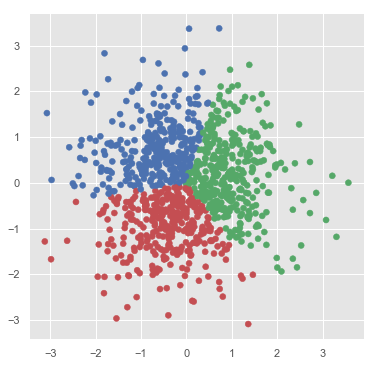

In [45]:
from sklearn.preprocessing import StandardScaler

k = 3


ss = StandardScaler()
df[features] = ss.fit_transform(df[features])

model = KMeans(n_clusters = k)
model.fit(df[features])

# Check our results
# Assign clusters back to our dataframe
df['cluster'] = model.labels_

# Get our centrois
centroids = model.cluster_centers_

# Setup some sweet colors for plotting (for later)
# colors = {'D':'red', 'E':'blue', 'F':'green'}
base_colors  =  ['r', 'g', 'b', 'y', 'k']
colors       =  [base_colors[centroid] for centroid in model.labels_]

# update x,y of our final clusters to plot later
fig, ax = plt.subplots(figsize=(6,6))

# Plot the scatter of our points with calculated centroids
ax.scatter(df[features[0]], df[features[1]], c=colors) # can also pass df['clusters'] as colors for quick and dirty plots
ax.scatter(centroids[:,0], centroids[:,1], c=base_colors, s=100) # cc.index

# And our score
silhouette = silhouette_score(df[features], df['cluster'], metric='euclidean')
inertia = model.inertia_
print("Silhouette Score: ", silhouette)
print("Inertia Score: ", inertia)

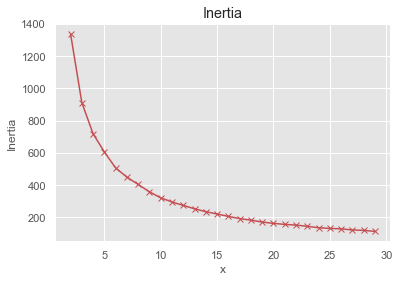

In [47]:
# As you can see, sometimes there is not a well-defined elbow!
inertias = []
k_list = list(range(2,30))
for n_clusters in k_list:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df[features])
    inertia = kmeans.inertia_
    inertias.append(inertia.mean())

plt.plot(k_list, inertias, 'rx-')
plt.ylabel("Inertia")
plt.xlabel("x")
plt.title("Inertia");